<a href="https://colab.research.google.com/github/fahimabrar/Natural-Language-Processing/blob/main/Spam%20Classification/Spam_Classificatoin_(SVM%2C_LogisticRegression%2C_NaiveBayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Spam and Non Spam message using Machine Learning

## This NoteBook Covers

- Reading data from Tab delimited binray files
- Data preprocessing using NLTK library (tokenization, lemmatization, Using Regular expression)
- Converting Tokens into TFIDF Vectors
- Classification Using Support Vector Machine, Logistic Regression and Naive Bayes
- Plotting Confusion Matrix 
- Cross Validataion 
- GridSearchCV for HyperParameter Tuning of SVM

### Higest Accuracy Obtained, 98.52 %

<a href = "https://www.linkedin.com/in/abrar-fahim/">Abrar</a>

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/fahimabrar/Natural-Language-Processing/main/Spam%20Classification/spam", sep='\t', names= ["label", "message"]))
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
import numpy as np
import nltk
nltk.download("punkt")
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import string
import re
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
np.random.seed(500)
# random seed is generated to obtain same resutl in each time

## Preprocessing Plan:


1.   Remove the punctuations
2.   Remove speical characters and numbers
3.   Tokenize the sentences into list of words
4.   Convert each word to lower case
5.   Lemmatize the words using nltk-wordnet Lemmatizer
6.   Convert the list into stirng (as TFIDF vectorizer needs string as input)



In [6]:
def preprocess(sentence):
  sentence.translate(str.maketrans('', '', string.punctuation))
  sentence =  re.sub('[^A-Za-z]+', ' ', sentence)
  tokens = nltk.word_tokenize(sentence)
  tokens = [word.lower() for word in tokens]
  tokens = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in tokens]
  tokens = str(tokens)
  return tokens

In [7]:
df["tokens"] = df.message.apply(preprocess)


In [8]:
df.head()

,label,message,tokens
0,ham,"Go until jurong point, crazy.. Available only ...","['go', 'until', 'jurong', 'point', 'crazy', 'a..."
1,ham,Ok lar... Joking wif u oni...,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"['free', 'entry', 'in', 'a', 'wkly', 'comp', '..."
3,ham,U dun say so early hor... U c already then say...,"['u', 'dun', 'say', 'so', 'early', 'hor', 'u',..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","['nah', 'i', 'don', 't', 'think', 'he', 'go', ..."


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
X = list(df['tokens'])
y = list(df['label'])
y = list(pd.get_dummies(y, drop_first = True)['spam'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['tokens'])
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)


In [12]:
print(Tfidf_vect.vocabulary_)

{'go': 1666, 'until': 4442, 'point': 2695, 'crazy': 697, 'available': 212, 'only': 2550, 'in': 1891, 'bugis': 397, 'great': 1697, 'world': 4833, 'la': 2057, 'buffet': 396, 'cine': 520, 'there': 4097, 'get': 1645, 'wat': 4637, 'ok': 2535, 'lar': 2070, 'joke': 1998, 'wif': 4751, 'oni': 2547, 'free': 1516, 'entry': 1246, 'wkly': 4799, 'comp': 573, 'to': 4198, 'win': 4763, 'fa': 1317, 'cup': 750, 'final': 1397, 'tkts': 4185, 'st': 3718, 'may': 2261, 'text': 4052, 'receive': 2984, 'question': 2897, 'std': 3746, 'txt': 4351, 'rate': 2941, 'apply': 155, 'over': 2584, 'dun': 1116, 'say': 3252, 'so': 3577, 'early': 1137, 'hor': 1816, 'already': 103, 'then': 4091, 'nah': 2427, 'don': 1041, 'think': 4113, 'he': 1754, 'usf': 4480, 'live': 2135, 'around': 178, 'here': 1775, 'though': 4132, 'freemsg': 1522, 'hey': 1779, 'darling': 804, 'it': 1953, 'be': 257, 'week': 4677, 'now': 2502, 'and': 120, 'no': 2480, 'word': 4827, 'back': 228, 'like': 2118, 'some': 3590, 'fun': 1576, 'you': 4957, 'up': 4444,

In [13]:
type(X_train)
#print(X_train)
len(y_test)

1115

## If we print(X_train) we will see the data is something like the following picture, 

where the format is (Row number, Unique Integer number of each word in the first row)  Score calculated by TF-IDF Vectorizer
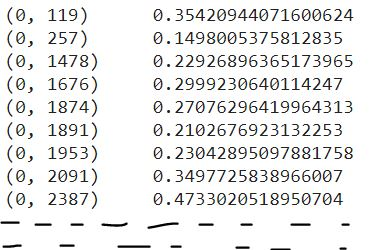

In [14]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate as CV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

Naive Bayes Accuracy Score ->  96.59192825112108


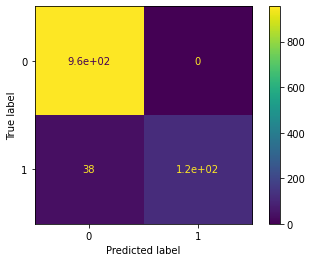

In [15]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)
# predict the labels on validation dataset
y_pred = Naive.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(y_pred , y_test)*100)

plot_confusion_matrix(Naive, X_test, y_test)  
plt.show()

# Interpretation of Confusion Matrix
## For 1115 test cases, 38 cases where the message is SPAM but the model detected it as Not SPAM


### Five fold Cross Validataion for Naive Bayes



In [16]:
Naive_acc_scores = cross_val_score(Naive, X_train, y_train, cv=5)
Naive_acc_scores

array([0.96188341, 0.9529148 , 0.96071829, 0.95173962, 0.9674523 ])

In [17]:
sum(Naive_acc_scores)/5

0.9589416839043148

# Logistic Regression

Logistic Regression Score ->  96.50224215246637


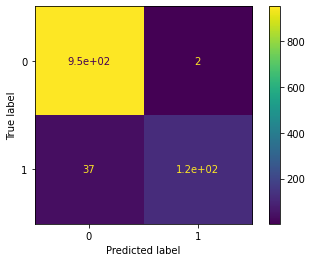

In [18]:
# fit the training dataset on the Logistic Regression classifier
LR = LogisticRegression(random_state=0)
LR.fit(X_train,y_train)
# predict the labels on validation dataset
y_pred = LR.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Logistic Regression Score -> ",accuracy_score(y_pred , y_test)*100)

plot_confusion_matrix(LR, X_test, y_test)  
plt.show()

### Five fold cross validation for logistic regression

In [19]:
LR_acc_scores = cross_val_score(LR, X_train, y_train, cv=5)
LR_acc_scores

array([0.96748879, 0.95852018, 0.96184063, 0.95959596, 0.97418631])

In [20]:
sum(LR_acc_scores)/5

0.9643263728465523

# Support Vector Machine

Support Vector Machine Score ->  98.9237668161435


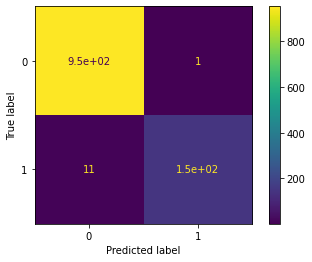

In [21]:
# fit the training dataset on the SVC classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)
# predict the labels on validation dataset
y_pred = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Support Vector Machine Score -> ",accuracy_score(y_pred , y_test)*100)

plot_confusion_matrix(SVM, X_test, y_test)  
plt.show()

### Five fold Cross validationfor SVM

In [22]:
SVM_acc_scores = cross_val_score(SVM, X_train, y_train, cv=5)
SVM_acc_scores

array([0.98542601, 0.97757848, 0.98765432, 0.97755331, 0.98653199])

In [23]:
sum(SVM_acc_scores)/5

0.9829488205422436

# Hyperparameter Tunning for SVM

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
gridclf = GridSearchCV(svm.SVC(), 
                       {'C': [1, 2], 'kernel':['rbf', 'linear'], 'gamma':['scale', 'auto']}, cv = 5)

In [26]:
gridclf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
gridclf.cv_results_

{'mean_fit_time': array([0.92947636, 0.40454926, 0.53848891, 0.40138416, 0.95203257,
        0.39622211, 0.54473581, 0.39197116]),
 'mean_score_time': array([0.19393921, 0.08305326, 0.11945319, 0.08456202, 0.19698114,
        0.07970853, 0.12049184, 0.08239121]),
 'mean_test_score': array([0.97599261, 0.98294882, 0.86829732, 0.98294882, 0.97868546,
        0.98519173, 0.86829732, 0.98519173]),
 'param_C': masked_array(data=[1, 1, 1, 1, 2, 2, 2, 2],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=['scale', 'scale', 'auto', 'auto', 'scale', 'scale',
                    'auto', 'auto'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear',
                    'rbf', 'linear'],
              mask=[False, False, False,

In [28]:
hyper_p = pd.DataFrame(gridclf.cv_results_)[["param_C", "param_kernel", "param_gamma", "mean_test_score"]].sort_values(by="mean_test_score",ascending=False)
hyper_p

,param_C,param_kernel,param_gamma,mean_test_score
5,2,linear,scale,0.985192
7,2,linear,auto,0.985192
1,1,linear,scale,0.982949
3,1,linear,auto,0.982949
4,2,rbf,scale,0.978685
0,1,rbf,scale,0.975993
2,1,rbf,auto,0.868297
6,2,rbf,auto,0.868297


In [32]:
gridclf.best_estimator_ 
# the best model (98% accuracy) is the one that has C = 2 and a linear kernel

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
gridclf.best_params_ 

{'C': 2, 'gamma': 'scale', 'kernel': 'linear'}

Without Hyperparameter accuracy for SVM was 98.29, with hyperparameter tuning accuracy increased to 98.52

# Comparisons Bewtween Different Machine Learning Models

|Model Name|Accuracy|
|---|---|
|SVM|98.52|
|Naive Bayes|95.89|
|Logistic Regression|96.43|



Findings: SVM with C = 2, and linear kernel has the best Accuracy that is 98.52 % achieved in this project
